In [453]:
# Standard libraries
from abc import abstractmethod
from typing import Iterable, List, Optional, Tuple  # Removed 'Type' as it is not used correctly

# Third-party libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from f3dasm import ExperimentData
import l2o

In [454]:
#show small data set input and output
# Paths to the CSV files relative to the notebook's location
input_csv_path = './small_dataset/small_dataset_input.csv'
output_csv_path = './small_dataset/small_dataset_output.csv'

# Reading the CSV files
input_df = pd.read_csv(input_csv_path)
output_df = pd.read_csv(output_csv_path)

In [455]:
input_df.head()

func_id  budget  dimensionality function_name  noise    seed
0     2198    2000               2      Thevenot    0.1  100895
1     1478    2000               2       Quartic    0.1   91077
2      130    2000               2          Levy    0.0  554703
3     2951    2000             100       Shubert    0.0  152730
4     2547    2000               2  Schwefel2_20    0.1  204304

In [456]:
output_df.head()

Unnamed: 0     path_raw     path_post
0        2198  raw/2198.nc  post/2198.nc
1        1478  raw/1478.nc  post/1478.nc
2         130   raw/130.nc   post/130.nc
3        2951  raw/2951.nc  post/2951.nc
4        2547  raw/2547.nc  post/2547.nc

In [457]:
#show input row func_id=691
input_df[input_df['func_id']==691]

func_id  budget  dimensionality function_name  noise    seed
98      691    2000              10        Ackley    0.0  504520

nvestigate the optimization data
To get familiar with the dataset, try to replicate the following experiments:
1.0 We start off by opening one of the experiments raw data of the small dataset
1.1. Choose the experiment with index 691 from the dataset. Note down the characteristics (e.g. dimen- sionality, noise level, noticeable loss-landscape characteristics). Before looking at the results: which optimizers do you expect to solve the problem with ease?

I think the ackley function is best solved by the particle swarm optimization. 
Instead of starting at one point, the particle swarm optimization has a bunch of points. They all communicate with each other to traverse the space. This decreases the risks of getting stuck in a local optimum. CMAES might also be really great. It would be 

1.2. Open the raw dataset in Python. You can use the open_one_dataset_raw() helper function.
1.3. Plot the objective values ’y’ found with the Adam optimizer for the first realization with respect to
the iteration number.
1.4. Repeat question 1.3 for the second realization. Is there a difference in the performance? If so, can you explain why?
1.5. In the figure you created in questions 1.3, overlay the objective values ’y’ found with the remaining optimizers for the first realization. Are they behaving differently?
1.6. We want to compare the best found solution at a given iteration in a so-called convergence plot. Take the cumulative minimum of the objective values with respect to the iteration number for each of the realizations. After that, take the median value over the realizations. Repeat this for every optimizer in the dataset9.
1.7. Plot the results you obtained in the previous exercise. Make sure your figure has a legend and you label each optimizer. Which optimizer is the ’winner’ and why?
1.8. Load up experiment 280 and repeat questions 1.6 and 1.7 for this dataset How do these results relate to the ’No Free Lunch’ theorem (4) ?


In [458]:
#1. We start off by opening one of the experiments raw data of the small dataset
#1.1. Choose the experiment with index 691 from the dataset. Note down the characteristics (e.g. dimen- sionality, noise level, noticeable loss-landscape characteristics). Before looking at the results: which optimizers do you expect to solve the problem with ease?
# Labels of the output data

from l2o import open_one_dataset_raw, open_one_dataset_post
from f3dasm import ExperimentData


# Labels of the output data
RAW_DATASET_LABEL = '/Users/hjiang/Desktop/L2O/L2O/small_dataset/small_dataset'

data = ExperimentData.from_file(RAW_DATASET_LABEL)

data_691=open_one_dataset_raw(data, index=691)

In [459]:
data_691 #this is the ackley function we are working with 

<xarray.Dataset>
Dimensions:      (iterations: 2030, input_dim: 10, realization: 10,
                  optimizer: 5, output_dim: 1)
Coordinates:
  * iterations   (iterations) int32 0 1 2 3 4 5 ... 2025 2026 2027 2028 2029
  * input_dim    (input_dim) object 'x0' 'x1' 'x2' 'x3' ... 'x6' 'x7' 'x8' 'x9'
  * realization  (realization) int32 0 1 2 3 4 5 6 7 8 9
  * optimizer    (optimizer) object 'CMAES' 'PSO' 'Adam' 'LBFGSB' 'RandomSearch'
  * output_dim   (output_dim) object 'y'
Data variables:
    input        (optimizer, realization, iterations, input_dim) float64 ...
    output       (optimizer, realization, iterations, output_dim) float64 ...
Attributes:
    number_of_samples:        30
    realization_seeds:        [504520 504521 504522 504523 504524 504525 5045...
    function_seed:            504520
    function_name:            Ackley
    function_noise:           0.0
    function_dimensionality:  10
    function_global_minimum:  4.440892098500626e-16
    function_features:        noiseless,high_dimensional,seperable,differenti...

In [460]:
#show all the data for optimizer column in data_691
# Accessing a data variable named 'optimizer' directly
optimizer_data = data_691['optimizer']
print(optimizer_data)


<xarray.DataArray 'optimizer' (optimizer: 5)>
array(['CMAES', 'PSO', 'Adam', 'LBFGSB', 'RandomSearch'], dtype=object)
Coordinates:
  * optimizer  (optimizer) object 'CMAES' 'PSO' 'Adam' 'LBFGSB' 'RandomSearch'


In [461]:
# 1.3. Plot the objective values ’y’ found with the Adam optimizer for the first realization with respect to
# the iteration number.

# Selecting the data for optimizer 'Adam' and realization 0
selected_slice_0 = data_691.sel(optimizer='Adam', realization=0)

# Isolating the 'output' data variable, which we are interested in plotting
# This will automatically include 'iterations' since it's a dimension of 'output'
output_data_0 = selected_slice_0['output']

# Converting to a pandas DataFrame
output_df_0 = output_data_0.to_dataframe().reset_index()

# The DataFrame now has 'iterations' as one of the columns alongside 'output'
output_df_0

iterations output_dim  realization optimizer     output
0              0          y            0      Adam  21.651508
1              1          y            0      Adam  21.457966
2              2          y            0      Adam  21.766518
3              3          y            0      Adam  21.044868
4              4          y            0      Adam  21.898939
...          ...        ...          ...       ...        ...
2025        2025          y            0      Adam  19.660733
2026        2026          y            0      Adam  19.660733
2027        2027          y            0      Adam  19.660733
2028        2028          y            0      Adam  19.660733
2029        2029          y            0      Adam  19.660733

[2030 rows x 5 columns]

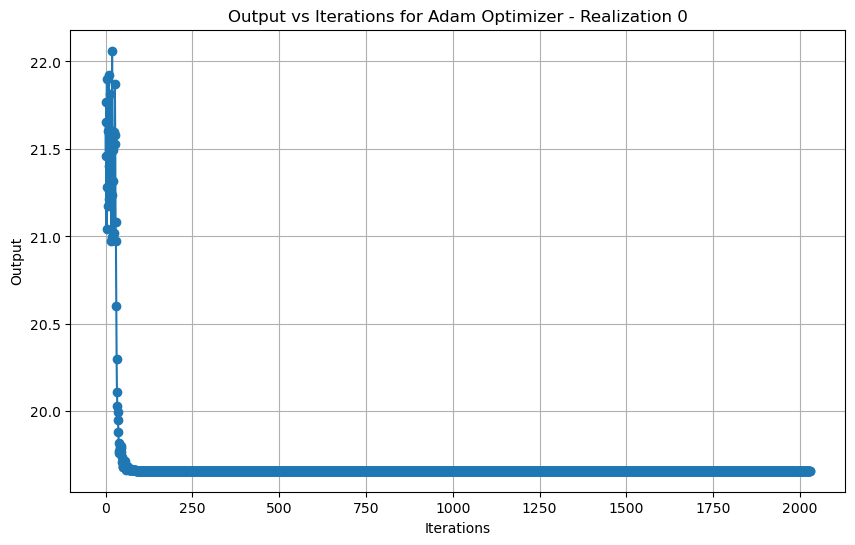

In [462]:

import matplotlib.pyplot as plt

# Plotting 'output' (y-axis) against 'iterations' (x-axis)
plt.figure(figsize=(10, 6))
plt.plot(output_df_0['iterations'], output_df_0['output'], marker='o', linestyle='-')
plt.title('Output vs Iterations for Adam Optimizer - Realization 0')
plt.xlabel('Iterations')
plt.ylabel('Output')
plt.grid(True)
plt.show()


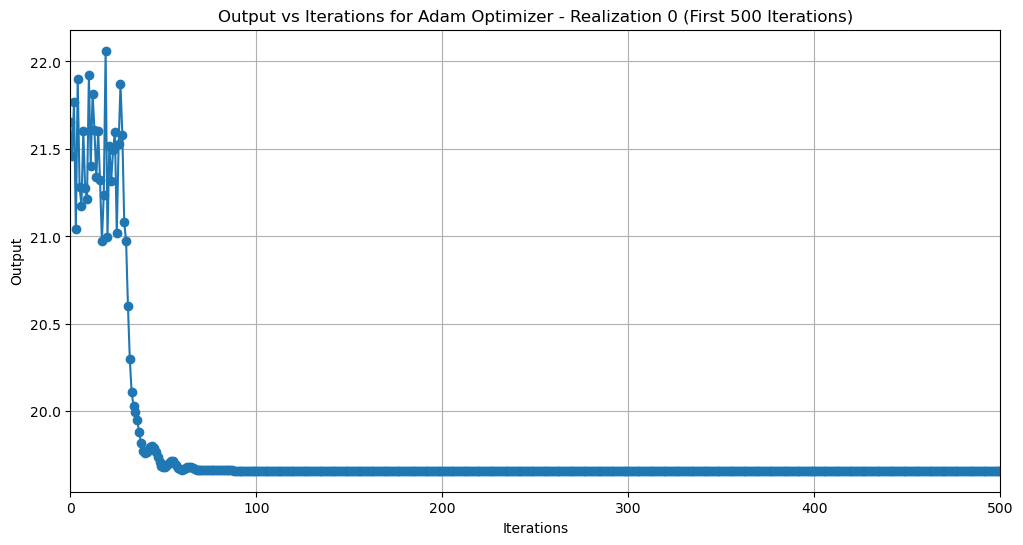

In [463]:


# Filter the DataFrame to include only the first 500 iterations
output_df_first_500 = output_df_0[output_df_0['iterations'] <= 500]

# Now plot the data
plt.figure(figsize=(12, 6))
plt.plot(output_df_first_500['iterations'], output_df_first_500['output'], marker='o', linestyle='-')
plt.title('Output vs Iterations for Adam Optimizer - Realization 0 (First 500 Iterations)')
plt.xlabel('Iterations')
plt.ylabel('Output')
plt.grid(True)
plt.xlim(0, 500) # Set the limit of x-axis to show only the first 500 iterations
plt.show()


In [464]:
# 1.4. 

# Selecting the data for optimizer 'Adam' and realization 1
selected_slice_1 = data_691.sel(optimizer='Adam', realization=1)

# Isolating the 'output' data variable, which we are interested in plotting
# This will automatically include 'iterations' since it's a dimension of 'output'
output_data_1 = selected_slice_1['output']

# Converting to a pandas DataFrame
output_df_1 = output_data_1.to_dataframe().reset_index()

# The DataFrame now has 'iterations' as one of the columns alongside 'output'
output_df_1

iterations output_dim  realization optimizer     output
0              0          y            1      Adam  21.963060
1              1          y            1      Adam  20.934511
2              2          y            1      Adam  21.982420
3              3          y            1      Adam  21.430098
4              4          y            1      Adam  21.722727
...          ...        ...          ...       ...        ...
2025        2025          y            1      Adam  19.557227
2026        2026          y            1      Adam  19.557227
2027        2027          y            1      Adam  19.557227
2028        2028          y            1      Adam  19.557227
2029        2029          y            1      Adam  19.557227

[2030 rows x 5 columns]

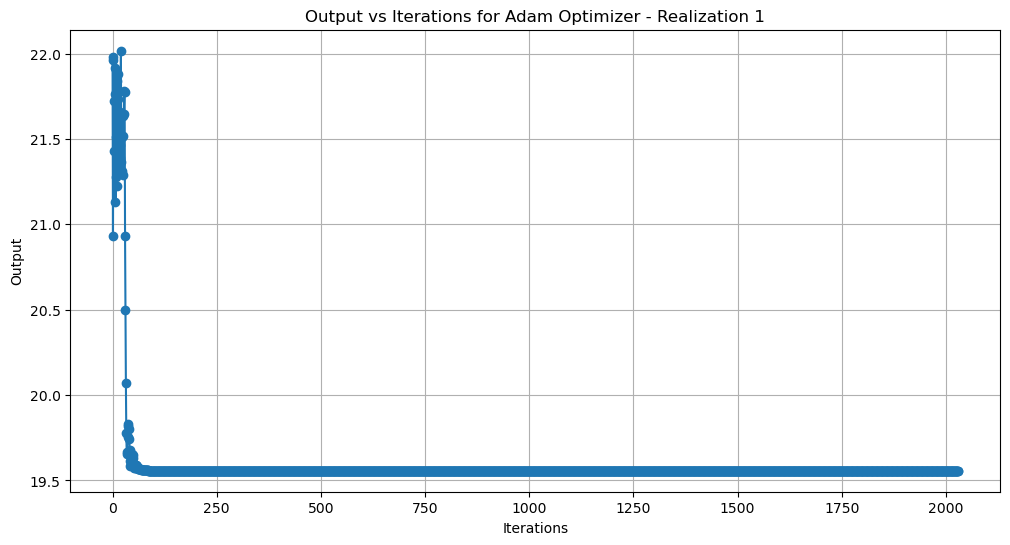

In [465]:
# Plotting 'output' (y-axis) against 'iterations' (x-axis)
plt.figure(figsize=(12, 6))
plt.plot(output_df_1['iterations'], output_df_1['output'], marker='o', linestyle='-')
plt.title('Output vs Iterations for Adam Optimizer - Realization 1')
plt.xlabel('Iterations')
plt.ylabel('Output')
plt.grid(True)
plt.show()

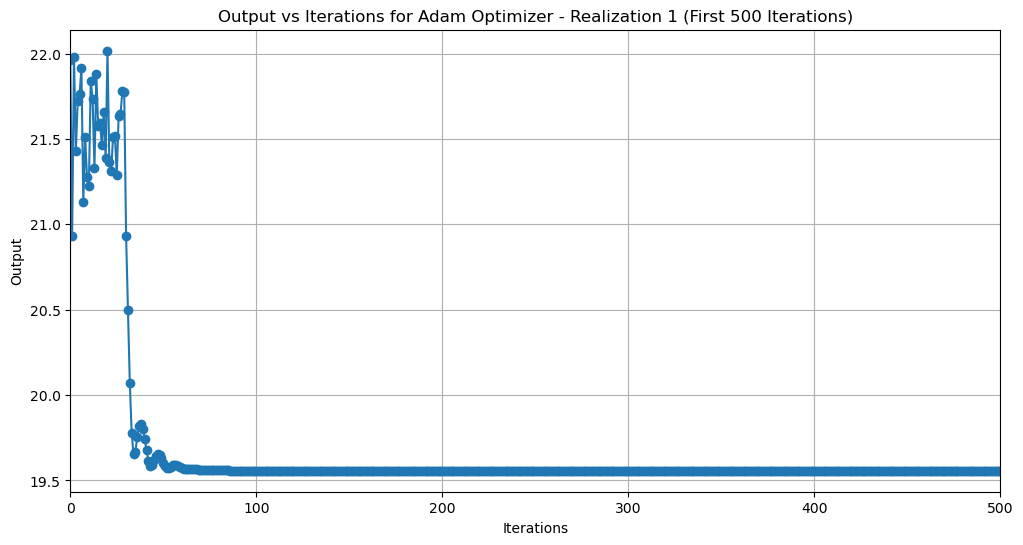

In [466]:
output_df_first_500_1 = output_df_1[output_df_1['iterations'] <= 500]

# Plotting the sliced data
plt.figure(figsize=(12, 6))
plt.plot(output_df_first_500_1 ['iterations'], output_df_first_500_1 ['output'], marker='o', linestyle='-')
plt.title('Output vs Iterations for Adam Optimizer - Realization 1 (First 500 Iterations)')
plt.xlabel('Iterations')
plt.ylabel('Output')
plt.grid(True)
plt.xlim(0, 500)  # Explicitly defining the x-axis limit to focus on the first 500 iterations
plt.show()

In [467]:
#there was not a big difference between the graphs on realization 0 and 1 because in each new iteration there is a random seed and new dataset. No information is carried over.

In [468]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data_691' is your xarray Dataset containing the data
# and that it includes multiple optimizer names as coordinates
optimizers = data_691.optimizer.values  # Get all optimizer names

plt.figure(figsize=(120, 80))  # Adjust the figure size as needed

# Set the window size for the rolling average
window_size = 5  # Adjust this based on your data

# Loop through each optimizer, select the data, convert to DataFrame, and plot
for opt in optimizers:
    # Selecting the data for current optimizer and realization 0
    selected_slice = data_691.sel(optimizer=opt, realization=0)
    # Isolating the 'output' data variable
    output_data = selected_slice['output']
    # Converting to a pandas DataFrame
    output_df = output_data.to_dataframe().reset_index()
    # Apply rolling average smoothing
    output_df['output_smoothed'] = output_df['output'].rolling(window=window_size, min_periods=1).mean()
    # Plotting smoothed 'output' against 'iterations' for the current optimizer
    plt.plot(output_df['iterations'], output_df['output_smoothed'], marker='o', linestyle='-', linewidth=4, markersize=12, label=opt)

# Increase the size of the title, labels, and ticks
plt.title('Smoothed Output vs Iterations for All Optimizers - Realization 0', fontsize=100)
plt.xlabel('Iterations', fontsize=100)
plt.ylabel('Smoothed Output', fontsize=100)
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)

# Enlarge the legend
plt.legend(prop={'size': 100})

# Increase the grid line width
plt.grid(True, linewidth=2)

plt.show()


In [469]:
#yes the optimizers are behaving very differently. CMAES is performing way better than all the other optimizers. PSO is very inconsistent, but appears to be the second best.

In [470]:
opt_list=data_691.optimizer.values

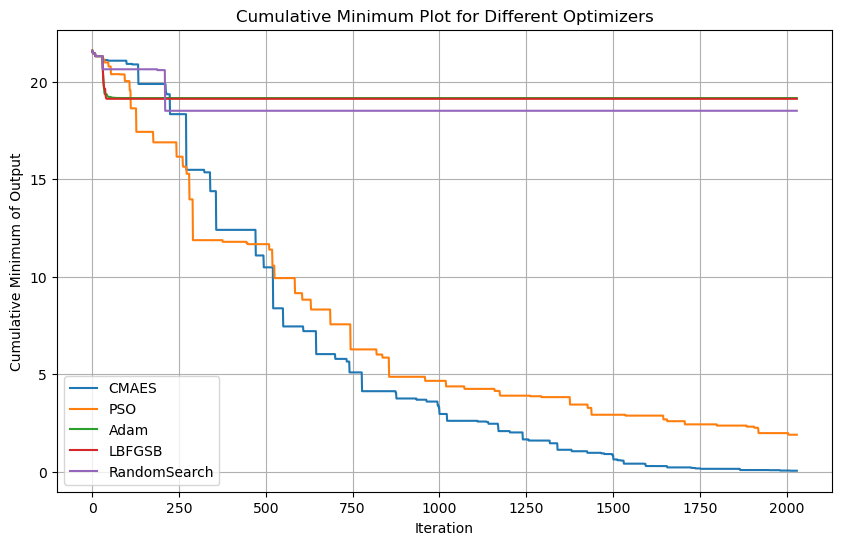

In [471]:
plt.figure(figsize=(10, 6))

for i in opt_list:
    # Selecting data for each optimizer and computing the median over realizations
    data_691_sel = data_691.sel(optimizer=i).median(dim='realization')

    # Extracting the 'output' data and converting to a NumPy array
    output_data = data_691_sel['output'].values

    # Calculating the cumulative minimum
    cummin_output = np.minimum.accumulate(output_data)

    # Plotting
    plt.plot(cummin_output, label=i)

plt.xlabel('Iteration')
plt.ylabel('Cumulative Minimum of Output')
plt.title('Cumulative Minimum Plot for Different Optimizers')
plt.legend()
plt.grid(True)
plt.show()

In [472]:
#the best optimizer is CMAES because it had the lowest cumulative minimum.

In [473]:
#1.8. Load up experiment 280 and repeat questions 1.6 and 1.7 for this dataset How do these results relate to the ’No Free Lunch’ theorem (4) ?

data_280=open_one_dataset_raw(data, index=280)

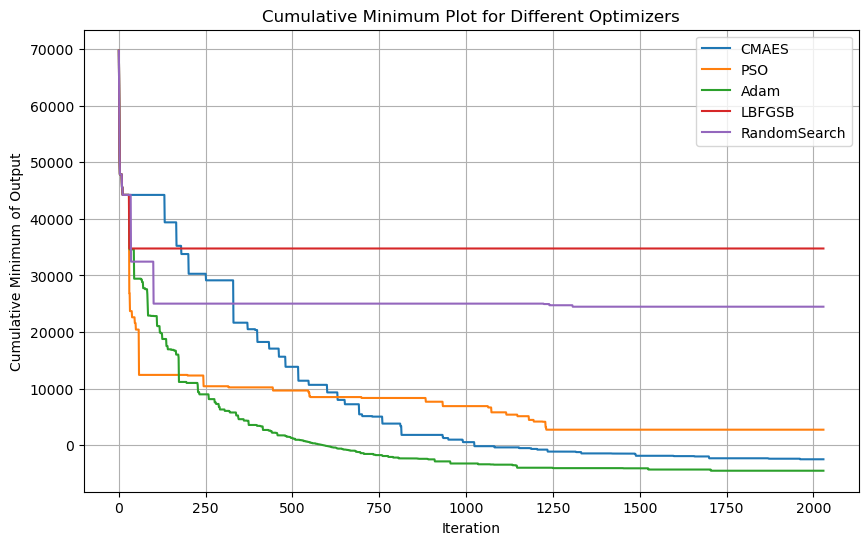

In [474]:
plt.figure(figsize=(10, 6))

for i in opt_list:
    # Selecting data for each optimizer and computing the median over realizations
    data_691_sel = data_280.sel(optimizer=i).median(dim='realization')

    # Extracting the 'output' data and converting to a NumPy array
    output_data = data_691_sel['output'].values

    # Calculating the cumulative minimum
    cummin_output = np.minimum.accumulate(output_data)

    # Plotting
    plt.plot(cummin_output, label=i)

plt.xlabel('Iteration')
plt.ylabel('Cumulative Minimum of Output')
plt.title('Cumulative Minimum Plot for Different Optimizers')
plt.legend()
plt.grid(True)
plt.show()

In [475]:
#The best optimizer is now the adam optimizer. This pertains to the no free lunch theorem because an optimizer that is good for one function is not necessarily good for another function.


Filter on the problem characteristics
2. In order to compare the optimization performance across different problems, we have to use a performance metric. To save you the hassle of post-processing the raw data, I have already done that for you in the post files with the ’performance profile’ metric.
2.1. Load the small dataset post dataset. You can use the open_all_datasets_post() helper function.
2.2. Plot the performance profile of the small dataset. You can use the plot_perf_profile() helper
function.
2.3. Now we will be looking at particular sub-sets of the benchmark problems. We will filter the dataset
on particular problem characteristics10. Consider the following 3 filters: i. All problems that have a dimensionality that is 10 or lower
ii. All problems that are both noiseless and convex
iii. All problems that are both separable and a maximum budget of 100 iterations or lower
Plot the performance profiles of each of the three sub-sets. Can you explain the differences between the performance profiles?

In [476]:
#Load the small dataset post dataset. You can use the open_all_datasets_post() helper function.
# Labels of the output data and assuming experiment index 691
from l2o import open_all_datasets_post, plot_perf_profile
small_data_post=open_all_datasets_post(data)

(<Figure size 1000x500 with 1 Axes>,
 <Axes: xlabel='Performance ratio (f)', ylabel='Fraction of problems solved'>)

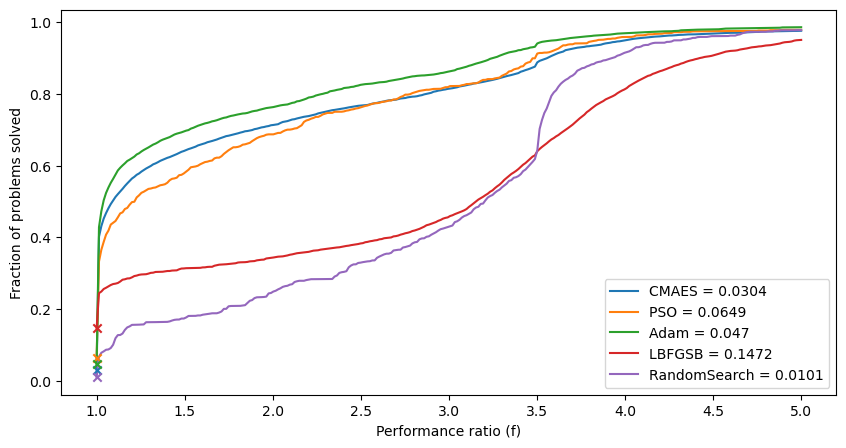

In [477]:
plot_perf_profile(small_data_post)

In [478]:
small_data_post

<xarray.Dataset>
Dimensions:         (iterations: 30, itemID: 1000, realization: 10,
                     output_dim: 1, optimizer: 5)
Coordinates:
  * iterations      (iterations) int32 0 1 2 3 4 5 6 7 ... 23 24 25 26 27 28 29
  * itemID          (itemID) int32 610 611 612 613 ... 29846 29847 29848 29849
  * realization     (realization) int32 0 1 2 3 4 5 6 7 8 9
  * optimizer       (optimizer) object 'CMAES' 'PSO' ... 'LBFGSB' 'RandomSearch'
  * output_dim      (output_dim) object 'y'
Data variables:
    samples_output  (itemID, realization, iterations, output_dim) float64 dask.array<chunksize=(10, 10, 30, 1), meta=np.ndarray>
    perf_profile    (itemID, optimizer, realization, output_dim) float64 dask.array<chunksize=(10, 5, 10, 1), meta=np.ndarray>
    ranking         (itemID, optimizer, output_dim) float64 dask.array<chunksize=(10, 5, 1), meta=np.ndarray>
    dim             (itemID) int32 dask.array<chunksize=(10,), meta=np.ndarray>
    budget          (itemID) int32 dask.array<chunksize=(10,), meta=np.ndarray>
    noise           (itemID) int32 dask.array<chunksize=(10,), meta=np.ndarray>
    convex          (itemID) int32 dask.array<chunksize=(10,), meta=np.ndarray>
    separable       (itemID) int32 dask.array<chunksize=(10,), meta=np.ndarray>
    multimodal      (itemID) int32 dask.array<chunksize=(10,), meta=np.ndarray>

In [479]:
# Filter the 'dim' data variable for entries that are less than 10
low_dim_ds=small_data_post.where(small_data_post['dim'] < 10)


(<Figure size 1000x500 with 1 Axes>,
 <Axes: xlabel='Performance ratio (f)', ylabel='Fraction of problems solved'>)

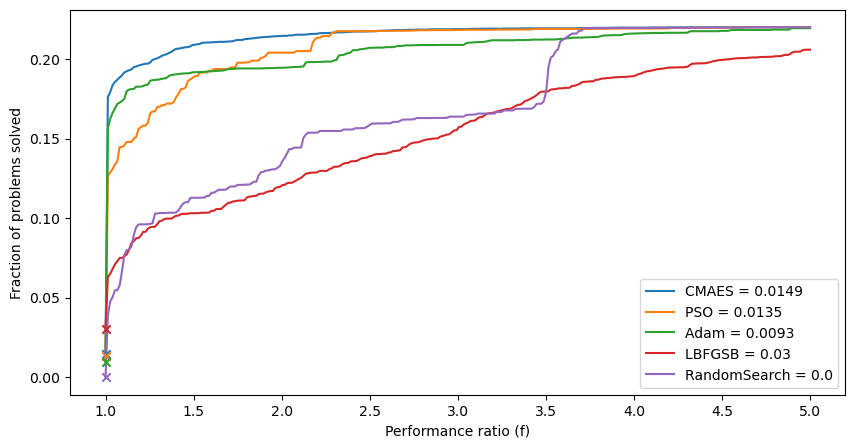

In [480]:
plot_perf_profile(low_dim_ds)

In [481]:
# All problems that are both noiseless and convex
noiseless_convex_ds=small_data_post.where((small_data_post['noise'] == 0) & (small_data_post['convex'] == True))

(<Figure size 1000x500 with 1 Axes>,
 <Axes: xlabel='Performance ratio (f)', ylabel='Fraction of problems solved'>)

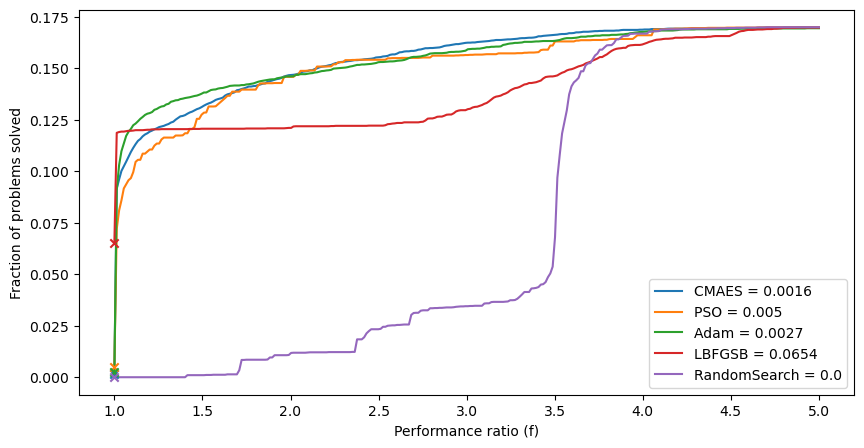

In [482]:
plot_perf_profile(noiseless_convex_ds)

In [483]:
# All problems that are both separable and a maximum budget of 100 iterations or lower
sep_low_budget_ds=small_data_post.where((small_data_post['separable'] == True) & (small_data_post['budget'] <= 100))




(<Figure size 1000x500 with 1 Axes>,
 <Axes: xlabel='Performance ratio (f)', ylabel='Fraction of problems solved'>)

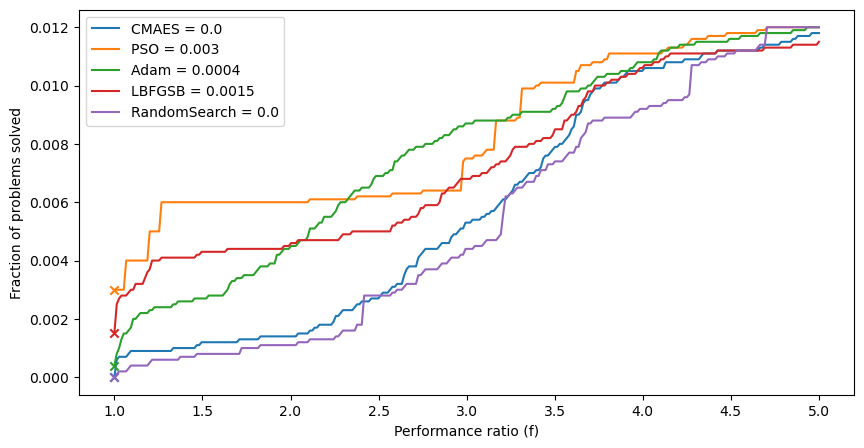

In [484]:
plot_perf_profile(sep_low_budget_ds)

In [485]:
#Plot the performance profiles of each of the three sub-sets. Can you explain the differences between the performance profiles?
#In the whole data set, Adam solves the most amount of problems
#For low dimension problems it appears that CMAES performs the best. The performance ratio is just how much the tolerance for each optimizer compared to the current best. At 1 this means it has to be exactly the same as the best. As the value gets larger, the comparisons become more lenient.
#for noiseless and convex problems, I would say Adam is the best optimizer. It is more robust than LBFGSB when the standards are relaxed a bit. LBFGSB flatlines and doesn't improve when the standards are lowered.
#For the separable and low budget problems, PSO is the best. However, they still solve a very low amount of problems.


In [486]:
import numpy as np
import xarray as xr
from l2o import CustomStrategy
from typing import Iterable

class YourStrategy(CustomStrategy):
    def __init__(self, classifier, name: str = "curate_opt"):
        self.classifier = classifier
        self.name = name

    def predict(self, features: xr.Dataset) -> Iterable[str]:
        # Prepare the feature array for prediction
        feature_array = np.column_stack([
            features.dim.values,
            features.budget.values,
            features.noise.values,
            features.convex.values,
            features.separable.values,
            features.multimodal.values
        ])

        # Predict with the classifier
        predictions = self.classifier.predict(feature_array)

        # Check if the output is probabilities (2D array) and convert to labels
        if predictions.ndim > 1 and predictions.shape[1] > 1:
            predicted_labels = np.argmax(predictions, axis=1)
        else:
            predicted_labels = predictions

        # Convert numeric labels to string labels if necessary
        index_to_optimizer = {0: 'CMAES', 1: 'PSO', 2: 'Adam', 3: 'LBFGSB', 4: 'RandomSearch'}
        predicted_optimizers = [index_to_optimizer.get(label, label) for label in predicted_labels]

        return predicted_optimizers


In [487]:
#we are going to split the small dataset 
from sklearn.model_selection import train_test_split
itemID_list = small_data_post.itemID.values
train_idx, test_idx = train_test_split(itemID_list, test_size=0.33, random_state=42)
# Select training and testing data
train_data = small_data_post.sel(itemID=train_idx)
test_data = small_data_post.sel(itemID=test_idx)
#now take the training data and split it into features and labels
#here are the features for the x_train. dim, budget, noise, convex, separable and multimodal
x_train = train_data[['dim', 'budget', 'noise', 'convex', 'separable', 'multimodal']]
x_test=test_data[['dim', 'budget', 'noise', 'convex', 'separable', 'multimodal']]

y_train=train_data['ranking']
y_test=test_data['ranking']

In [488]:
import numpy as np
import xarray as xr
#transforms the data into a format that the classifier can use
def transform_data(y_data):
    # Convert xarray DataArray to NumPy array
    y_np = y_data.values

    # Flatten the last two dimensions
    y_flat = y_np.reshape(y_np.shape[0], -1)

    # Initialize a new flattened array with zeros
    y_transformed_flat = np.zeros_like(y_flat)

    # Find the indices of the minimum values
    min_indices = np.argmin(y_flat, axis=1)

    # Set the minimum values to 1
    y_transformed_flat[np.arange(y_flat.shape[0]), min_indices] = 1

    # Reshape back to the original shape
    y_transformed_np = y_transformed_flat.reshape(y_np.shape)

    # Convert the transformed NumPy array back to an xarray DataArray
    return xr.DataArray(y_transformed_np, coords=y_data.coords, dims=y_data.dims)


# # Transform y_train and y_test
y_train_transformed = transform_data(y_train)
y_test_transformed = transform_data(y_test)

In [489]:
# Convert x_train and y_train to pandas DataFrames
x_train_df = x_train.to_dataframe()

# For y_train_transformed
# Step 1: Find the index of the 1s in the optimizer dimension
train_max_indices = y_train_transformed.argmax(dim='optimizer')

# Step 2: Use these indices to select the optimizer names
# Assuming the optimizer names are stored in the 'optimizer' coordinate of y_train_transformed
train_best_optimizer = y_train_transformed.optimizer.isel(optimizer=train_max_indices)
train_best_optimizer_df=train_best_optimizer.to_dataframe()

# For y_test_transformed
# Repeat the process for y_test_transformed
test_max_indices = y_test_transformed.argmax(dim='optimizer')
test_best_optimizer = y_test_transformed.optimizer.isel(optimizer=test_max_indices)

# Now you have two DataArrays: train_best_optimizer and test_best_optimizer
# which contain the names of the best optimizer for each itemID
train_best_optimizer=train_best_optimizer.to_numpy().flatten()
train_best_optimizer.shape
x_train_df.shape


(670, 6)

In [490]:

from sklearn.neighbors import KNeighborsClassifier
from l2o import StrategyManager
import matplotlib.pyplot as plt

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn_model=knn.fit(x_train_df, train_best_optimizer)
# Assuming experimentdata is your ExperimentData object for the test set

# Create an instance of your strategy with the pre-trained classifier
knn_strategy = YourStrategy(knn_model, name="KNN")


/Users/hjiang/miniforge3/envs/3dasm/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/hjiang/miniforge3/envs/3dasm/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/hjiang/miniforge3/envs/3dasm/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


/Users/hjiang/miniforge3/envs/3dasm/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


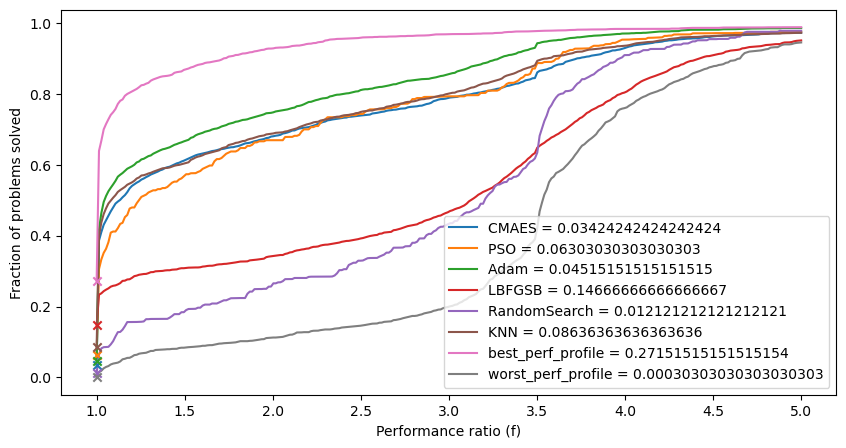

In [491]:

# Create the StrategyManager instance with the experiment data and your strategy
strategy_manager = StrategyManager(test_data, [knn_strategy])

# Compute the performance profiles
performance_profiles = strategy_manager.compute_performance_profiles()

# Plot the performance profiles
strategy_manager.plot()
plt.show()  # If not running in an interactive environment that automatically shows plots


In [492]:
#you can see from the graph that our model under performs adam. I want to be able to build something that outpredicts adam all the time

In [493]:
# import optuna
# import xgboost as xgb
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# import pickle  # Import pickle for model saving

# # Seed for reproducibility
# random_seed = 42

# # Assuming 'train_best_optimizer' is your y_train and 'x_train_df' is your training data
# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(train_best_optimizer)

# # Splitting data with a seed for consistency
# X_train, X_valid, y_train, y_valid = train_test_split(x_train_df, y_train_encoded, test_size=0.2, random_state=random_seed)

# def objective(trial):
#     # Define hyperparameters with a seed for consistency in XGBoost
#     param = {
#         # ... [Your other hyperparameters here] ...
#         'random_state': random_seed
#     }

#     model = xgb.XGBClassifier(**param, early_stopping_rounds=10)
#     model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=False)
#     preds = model.predict(X_valid)
#     return accuracy_score(y_valid, preds)

# # Creating an Optuna study with a fixed seed for the sampler
# sampler = optuna.samplers.TPESampler(seed=random_seed)
# study = optuna.create_study(direction='maximize', sampler=sampler)
# study.optimize(objective, n_trials=50)

# # Best hyperparameters
# best_params = study.best_trial.params
# best_params['random_state'] = random_seed  # Ensure the model uses the same seed
# print('Best parameters:', best_params)

# # Train the final model with the best parameters
# best_xgb_model = xgb.XGBClassifier(**best_params)
# best_xgb_model.fit(x_train_df, y_train_encoded)

#load saved model
import pickle
with open('best_xgb_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
best_xgb_model=loaded_model


In [494]:
# # check if 
xgb_strategy = YourStrategy(best_xgb_model, name="XGBoost")
print(xgb_strategy .predict(x_test))

['Adam', 'Adam', 'CMAES', 'CMAES', 'LBFGSB', 'LBFGSB', 'CMAES', 'PSO', 'LBFGSB', 'CMAES', 'CMAES', 'CMAES', 'Adam', 'CMAES', 'CMAES', 'CMAES', 'PSO', 'PSO', 'CMAES', 'CMAES', 'Adam', 'CMAES', 'PSO', 'Adam', 'PSO', 'CMAES', 'CMAES', 'CMAES', 'PSO', 'PSO', 'CMAES', 'CMAES', 'CMAES', 'CMAES', 'CMAES', 'Adam', 'CMAES', 'Adam', 'CMAES', 'Adam', 'CMAES', 'CMAES', 'CMAES', 'CMAES', 'CMAES', 'Adam', 'CMAES', 'PSO', 'LBFGSB', 'PSO', 'Adam', 'PSO', 'LBFGSB', 'Adam', 'RandomSearch', 'CMAES', 'Adam', 'CMAES', 'Adam', 'CMAES', 'CMAES', 'Adam', 'Adam', 'Adam', 'PSO', 'LBFGSB', 'CMAES', 'LBFGSB', 'CMAES', 'Adam', 'CMAES', 'CMAES', 'Adam', 'PSO', 'CMAES', 'PSO', 'Adam', 'CMAES', 'Adam', 'PSO', 'LBFGSB', 'CMAES', 'Adam', 'CMAES', 'CMAES', 'Adam', 'CMAES', 'PSO', 'PSO', 'CMAES', 'CMAES', 'CMAES', 'Adam', 'PSO', 'CMAES', 'PSO', 'CMAES', 'PSO', 'CMAES', 'PSO', 'CMAES', 'PSO', 'CMAES', 'CMAES', 'Adam', 'CMAES', 'Adam', 'LBFGSB', 'CMAES', 'PSO', 'Adam', 'CMAES', 'CMAES', 'LBFGSB', 'PSO', 'LBFGSB', 'PSO', 'L

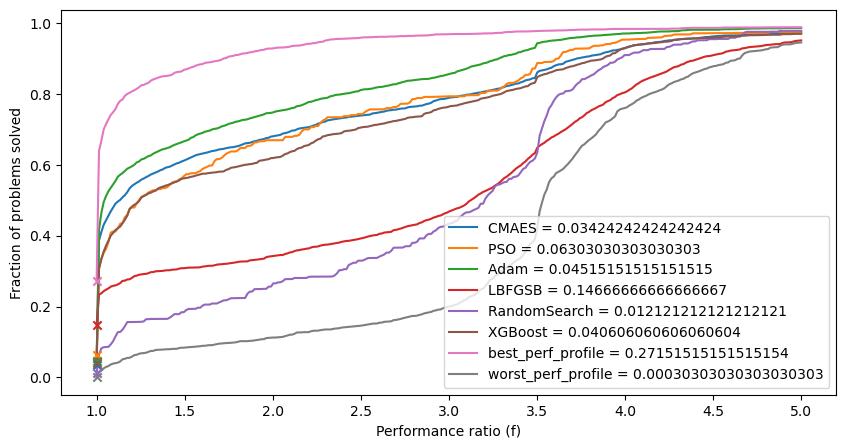

In [495]:


# Create the StrategyManager instance with the experiment data and your strategy
strategy_manager = StrategyManager(test_data, [xgb_strategy])

# Compute the performance profiles
performance_profiles = strategy_manager.compute_performance_profiles()

# Plot the performance profiles
strategy_manager.plot()
plt.show()  # If not running in an interactive environment that automatically shows plots


In [496]:
# import optuna
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# import pickle  # Import pickle for model saving

# # Seed for reproducibility
# random_seed = 42

# # Assuming 'train_best_optimizer' is your y_train and 'x_train_df' is your training data
# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(train_best_optimizer)

# # Splitting data with a seed for consistency
# X_train, X_valid, y_train, y_valid = train_test_split(x_train_df, y_train_encoded, test_size=0.2, random_state=random_seed)

# def objective(trial):
#     # Define hyperparameters with a seed for consistency in SVM
#     param = {
#         'C': trial.suggest_loguniform('C', 1, 100),  # Narrowed range for C
#         'gamma': trial.suggest_loguniform('gamma', 1e-4, 1e-1),  # Narrowed range for gamma
#         'kernel': 'rbf',
#         'class_weight': 'balanced'  # Automatically adjust weights
#     }

#     model = SVC(**param, random_state=random_seed)
#     model.fit(X_train, y_train)
#     preds = model.predict(X_valid)
#     return accuracy_score(y_valid, preds)

# # Creating an Optuna study with a fixed seed for the sampler
# sampler = optuna.samplers.TPESampler(seed=random_seed)
# study = optuna.create_study(direction='maximize', sampler=sampler)
# study.optimize(objective, n_trials=30)  # Reduced number of trials

# # Best hyperparameters
# best_params = study.best_trial.params
# print('Best parameters:', best_params)

# # Train the final model with the best parameters
# best_svm_model = SVC(**best_params, random_state=random_seed)
# best_svm_model.fit(x_train_df, y_train_encoded)

# # Save the model
# with open('best_svm_model.pkl', 'wb') as file:
#     pickle.dump(best_svm_model, file)

# Load saved model (for future use)
import pickle
with open('best_svm_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
best_svm_model = loaded_model


/Users/hjiang/miniforge3/envs/3dasm/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


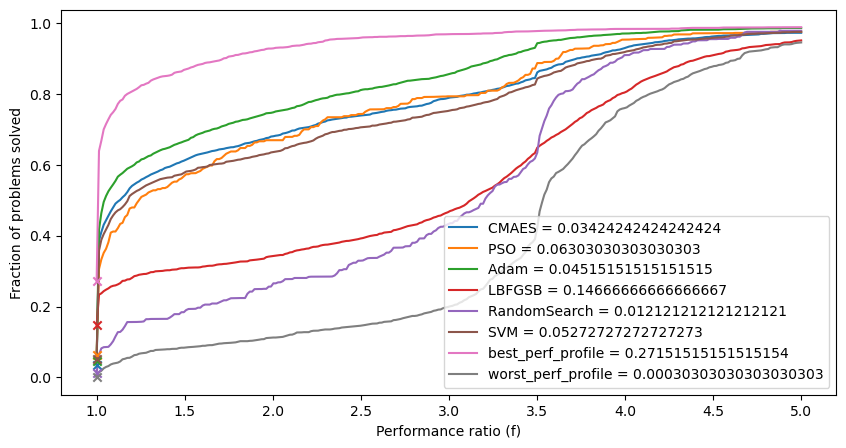

In [497]:

svm_strategy = YourStrategy(best_svm_model, name="SVM")

# Create the StrategyManager instance with the experiment data and your strategy
strategy_manager = StrategyManager(test_data, [svm_strategy])

# Compute the performance profiles
performance_profiles = strategy_manager.compute_performance_profiles()

# Plot the performance profiles
strategy_manager.plot()
plt.show()  # If not running in an interactive environment that automatically shows plots


In [498]:
import optuna
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(train_best_optimizer)

# # Splitting data for early stopping and validation
# X_train, X_valid, y_train, y_valid = train_test_split(x_train_df, y_train_encoded, test_size=0.2, random_state=42)

# def create_model(trial):
#     model = Sequential()
#     model.add(Dense(trial.suggest_int('n_units_l1', 32, 256), activation=trial.suggest_categorical('activation_l1', ['relu', 'tanh']), input_shape=(X_train.shape[1],)))
#     model.add(Dropout(trial.suggest_float('dropout_l1', 0.1, 0.5)))
    
#     n_layers = trial.suggest_int('n_layers', 1, 3)
#     for i in range(n_layers):
#         model.add(Dense(trial.suggest_int(f'n_units_l{i+2}', 32, 256), activation=trial.suggest_categorical(f'activation_l{i+2}', ['relu', 'tanh'])))
#         model.add(Dropout(trial.suggest_float(f'dropout_l{i+2}', 0.1, 0.5)))

#     model.add(Dense(len(np.unique(y_train)), activation='softmax'))

#     model.compile(
#         optimizer=trial.suggest_categorical('optimizer', ['adam', 'rmsprop']),
#         loss='sparse_categorical_crossentropy',
#         metrics=['accuracy']
#     )
#     return model

# def objective(trial):
#     model = create_model(trial)

#     early_stopping = EarlyStopping(monitor='val_loss', patience=3)
    
#     model.fit(
#         X_train, y_train,
#         validation_data=(X_valid, y_valid),
#         epochs=trial.suggest_int('epochs', 10, 100),
#         batch_size=trial.suggest_int('batch_size', 32, 128),
#         callbacks=[early_stopping],
#         verbose=False
#     )

#     _, accuracy = model.evaluate(X_valid, y_valid, verbose=0)
#     return accuracy

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

# best_params = study.best_trial.params
# print('Best parameters:', best_params)

# final_ann_model = create_model(study.best_trial)
# final_ann_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1)

# # Save the trained model
# final_ann_model.save('final_ann_model.h5')


In [499]:

final_ann_model=tf.keras.models.load_model('final_ann_model.h5')
ann_strategy = YourStrategy(final_ann_model, name="ann")
print(ann_strategy.predict(test_data))

11/11 [==============================] - 0s 453us/step
['Adam', 'Adam', 'Adam', 'Adam', 'CMAES', 'Adam', 'CMAES', 'Adam', 'Adam', 'CMAES', 'CMAES', 'CMAES', 'Adam', 'CMAES', 'Adam', 'CMAES', 'Adam', 'Adam', 'CMAES', 'Adam', 'Adam', 'CMAES', 'Adam', 'CMAES', 'Adam', 'Adam', 'CMAES', 'CMAES', 'Adam', 'Adam', 'CMAES', 'CMAES', 'CMAES', 'CMAES', 'Adam', 'Adam', 'Adam', 'Adam', 'CMAES', 'Adam', 'CMAES', 'Adam', 'Adam', 'CMAES', 'CMAES', 'Adam', 'CMAES', 'Adam', 'Adam', 'CMAES', 'Adam', 'CMAES', 'Adam', 'CMAES', 'LBFGSB', 'CMAES', 'Adam', 'CMAES', 'Adam', 'Adam', 'CMAES', 'Adam', 'CMAES', 'CMAES', 'Adam', 'CMAES', 'Adam', 'CMAES', 'CMAES', 'Adam', 'LBFGSB', 'CMAES', 'Adam', 'Adam', 'CMAES', 'Adam', 'Adam', 'CMAES', 'CMAES', 'CMAES', 'Adam', 'Adam', 'Adam', 'Adam', 'Adam', 'Adam', 'CMAES', 'Adam', 'Adam', 'Adam', 'CMAES', 'CMAES', 'CMAES', 'Adam', 'CMAES', 'Adam', 'CMAES', 'Adam', 'Adam', 'Adam', 'Adam', 'Adam', 'Adam', 'Adam', 'Adam', 'CMAES', 'Adam', 'Adam', 'CMAES', 'Adam', 'Adam', 'Adam',

11/11 [==============================] - 0s 373us/step


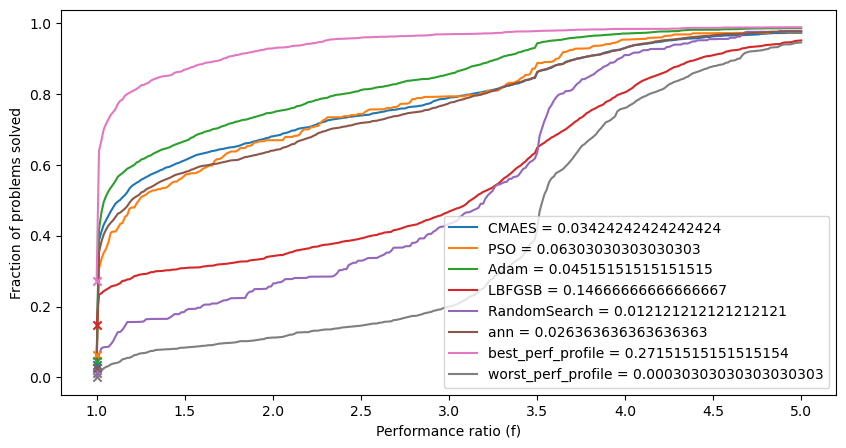

In [500]:



# Create the StrategyManager instance with the experiment data and your strategy
strategy_manager = StrategyManager(test_data, [ann_strategy])

# Compute the performance profiles
performance_profiles = strategy_manager.compute_performance_profiles()

# Plot the performance profiles
strategy_manager.plot()
plt.show()  # If not running in an interactive environment that automatically shows plots


11/11 [==============================] - 0s 355us/step


/Users/hjiang/miniforge3/envs/3dasm/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/hjiang/miniforge3/envs/3dasm/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


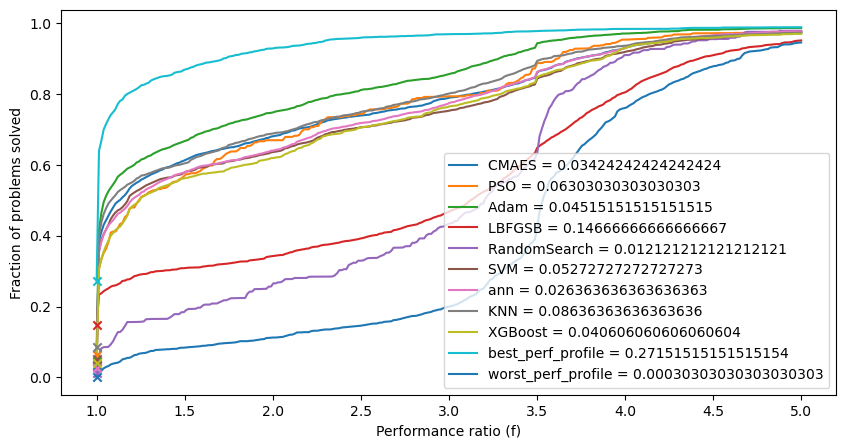

In [501]:
#all the small dataset so far
strategy_manager = StrategyManager(test_data, [svm_strategy, ann_strategy,knn_strategy,xgb_strategy])
# Compute the performance profiles
performance_profiles = strategy_manager.compute_performance_profiles()

# Plot the performance profiles
strategy_manager.plot()
plt.show()  # If not running in an interactive environment that automatically shows plots

In [502]:

# # Assuming 'test_data' is an xarray.Dataset
# # Extract features and create a DataFrame
# feature_df = pd.DataFrame({
#     'dim': test_data.dim.values,
#     'budget': test_data.budget.values,
#     'noise': test_data.noise.values,
#     'convex': test_data.convex.values,
#     'separable': test_data.separable.values,
#     'multimodal': test_data.multimodal.values
# })

# feature_df

In [503]:
#implement with big dataset
# Labels of the output data
RAW_DATASET_LABEL_BIG = '/Users/hjiang/Desktop/L2O/L2O/big_dataset/big_dataset'
data_big = ExperimentData.from_file(RAW_DATASET_LABEL_BIG)
big_data_post=open_all_datasets_post(data_big)

In [504]:
big_data_post

<xarray.Dataset>
Dimensions:         (iterations: 30, itemID: 29430, realization: 10,
                     output_dim: 1, optimizer: 5)
Coordinates:
  * iterations      (iterations) int32 0 1 2 3 4 5 6 7 ... 23 24 25 26 27 28 29
  * itemID          (itemID) int32 0 1 2 3 4 5 ... 29995 29996 29997 29998 29999
  * realization     (realization) int32 0 1 2 3 4 5 6 7 8 9
  * optimizer       (optimizer) object 'CMAES' 'PSO' ... 'LBFGSB' 'RandomSearch'
  * output_dim      (output_dim) object 'y'
Data variables:
    samples_output  (itemID, realization, iterations, output_dim) float64 dask.array<chunksize=(10, 10, 30, 1), meta=np.ndarray>
    perf_profile    (itemID, optimizer, realization, output_dim) float64 dask.array<chunksize=(10, 5, 10, 1), meta=np.ndarray>
    ranking         (itemID, optimizer, output_dim) float64 dask.array<chunksize=(10, 5, 1), meta=np.ndarray>
    dim             (itemID) int32 dask.array<chunksize=(10,), meta=np.ndarray>
    budget          (itemID) int32 dask.array<chunksize=(10,), meta=np.ndarray>
    noise           (itemID) int32 dask.array<chunksize=(10,), meta=np.ndarray>
    convex          (itemID) int32 dask.array<chunksize=(10,), meta=np.ndarray>
    separable       (itemID) int32 dask.array<chunksize=(10,), meta=np.ndarray>
    multimodal      (itemID) int32 dask.array<chunksize=(10,), meta=np.ndarray>

In [505]:
big_best_op_df=big_data_post['perf_profile'].mean('realization').idxmin(
            'optimizer', fill_value='RandomSearch').sel(
                output_dim='y').drop('output_dim').to_dataframe()
big_best_op_list=big_data_post['perf_profile'].mean('realization').idxmin(
            'optimizer', fill_value='RandomSearch').sel(
                output_dim='y').drop('output_dim').values.tolist()
            
#the mean is the average of performance over the 10 realizations. This give you the list of best optimizers. 

In [506]:
#split the big dataset into training and testing by index

#we are going to split the small dataset 
from sklearn.model_selection import train_test_split
itemID_list = big_data_post.itemID.values
train_idx_b, test_idx_b = train_test_split(itemID_list, test_size=0.33, random_state=42)
# Select training and testing data
train_data_b = big_data_post.sel(itemID=train_idx_b)
test_data_b = big_data_post.sel(itemID=test_idx_b)
#now take the training data and split it into features and labels
#here are the features for the x_train. dim, budget, noise, convex, separable and multimodal
x_train_b = train_data_b[['dim', 'budget', 'noise', 'convex', 'separable', 'multimodal']]
x_test_b=test_data_b[['dim', 'budget', 'noise', 'convex', 'separable', 'multimodal']]
x_test_b_df=x_test_b.to_dataframe()

y_train_b=train_data_b['ranking']
y_test_b=test_data_b['ranking']

y_train_trans_b = transform_data(y_train_b)
y_test_trans_b = transform_data(y_test_b)

In [507]:
# Convert x_train and y_train to pandas DataFrames
x_train_b_df = x_train_b.to_dataframe()

# For y_train_transformed
# Step 1: Find the index of the 1s in the optimizer dimension
train_max_indices_b = y_train_trans_b.argmax(dim='optimizer')

# Step 2: Use these indices to select the optimizer names
# Assuming the optimizer names are stored in the 'optimizer' coordinate of y_train_transformed
train_best_optimizer_b = y_train_trans_b.optimizer.isel(optimizer=train_max_indices_b)
train_best_optimizer_b_df=train_best_optimizer_b.to_dataframe()

# For y_test_transformed
# Repeat the process for y_test_transformed
test_max_indices_b = y_test_trans_b.argmax(dim='optimizer')
test_best_optimizer_b = y_test_trans_b.optimizer.isel(optimizer=test_max_indices_b)

# Now you have two DataArrays: train_best_optimizer and test_best_optimizer
# which contain the names of the best optimizer for each itemID
train_best_optimizer_b=train_best_optimizer_b.to_numpy().flatten()
train_best_optimizer_b.shape
x_train_b_df.shape


(19718, 6)

In [508]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn_model=knn.fit(x_train_b_df, train_best_optimizer_b)
# Assuming experimentdata is your ExperimentData object for the test set

# Create an instance of your strategy with the pre-trained classifier
knn_strategy = YourStrategy(knn_model, name="KNN")

y_pred_list=knn_strategy.predict(x_test_b)
print(y_pred_list)
print(len(y_pred_list))

/Users/hjiang/miniforge3/envs/3dasm/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/hjiang/miniforge3/envs/3dasm/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/hjiang/miniforge3/envs/3dasm/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


['Adam', 'Adam', 'CMAES', 'CMAES', 'CMAES', 'Adam', 'Adam', 'Adam', 'Adam', 'Adam', 'Adam', 'Adam', 'LBFGSB', 'CMAES', 'Adam', 'CMAES', 'Adam', 'Adam', 'Adam', 'CMAES', 'PSO', 'Adam', 'Adam', 'Adam', 'PSO', 'CMAES', 'Adam', 'Adam', 'Adam', 'Adam', 'Adam', 'Adam', 'Adam', 'CMAES', 'Adam', 'Adam', 'Adam', 'Adam', 'LBFGSB', 'Adam', 'CMAES', 'Adam', 'Adam', 'CMAES', 'Adam', 'Adam', 'Adam', 'Adam', 'CMAES', 'LBFGSB', 'LBFGSB', 'Adam', 'Adam', 'Adam', 'CMAES', 'Adam', 'Adam', 'Adam', 'Adam', 'CMAES', 'Adam', 'Adam', 'Adam', 'Adam', 'Adam', 'CMAES', 'CMAES', 'Adam', 'Adam', 'CMAES', 'Adam', 'Adam', 'Adam', 'Adam', 'CMAES', 'Adam', 'Adam', 'Adam', 'LBFGSB', 'Adam', 'Adam', 'Adam', 'Adam', 'Adam', 'Adam', 'PSO', 'CMAES', 'LBFGSB', 'CMAES', 'LBFGSB', 'Adam', 'Adam', 'CMAES', 'Adam', 'CMAES', 'Adam', 'PSO', 'Adam', 'Adam', 'PSO', 'CMAES', 'Adam', 'CMAES', 'LBFGSB', 'PSO', 'Adam', 'Adam', 'Adam', 'Adam', 'Adam', 'CMAES', 'CMAES', 'Adam', 'Adam', 'Adam', 'Adam', 'CMAES', 'Adam', 'LBFGSB', 'CMAES', 

/Users/hjiang/miniforge3/envs/3dasm/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [509]:
#show performance visualization 
y_test_act_b=test_best_optimizer_b.values.flatten().tolist()
print(y_test_act_b)
print(len(y_test_act_b))


['LBFGSB', 'Adam', 'Adam', 'Adam', 'Adam', 'Adam', 'Adam', 'Adam', 'PSO', 'Adam', 'PSO', 'RandomSearch', 'Adam', 'Adam', 'Adam', 'PSO', 'Adam', 'Adam', 'Adam', 'CMAES', 'CMAES', 'PSO', 'CMAES', 'Adam', 'CMAES', 'PSO', 'Adam', 'Adam', 'Adam', 'Adam', 'Adam', 'CMAES', 'CMAES', 'Adam', 'Adam', 'Adam', 'CMAES', 'Adam', 'PSO', 'Adam', 'CMAES', 'Adam', 'CMAES', 'CMAES', 'Adam', 'CMAES', 'CMAES', 'PSO', 'Adam', 'LBFGSB', 'PSO', 'CMAES', 'Adam', 'Adam', 'PSO', 'LBFGSB', 'PSO', 'CMAES', 'Adam', 'LBFGSB', 'CMAES', 'LBFGSB', 'LBFGSB', 'PSO', 'CMAES', 'CMAES', 'CMAES', 'Adam', 'Adam', 'LBFGSB', 'Adam', 'LBFGSB', 'PSO', 'Adam', 'Adam', 'PSO', 'CMAES', 'Adam', 'LBFGSB', 'Adam', 'CMAES', 'CMAES', 'CMAES', 'CMAES', 'Adam', 'CMAES', 'Adam', 'PSO', 'Adam', 'LBFGSB', 'Adam', 'CMAES', 'Adam', 'Adam', 'LBFGSB', 'CMAES', 'PSO', 'LBFGSB', 'CMAES', 'CMAES', 'CMAES', 'CMAES', 'CMAES', 'LBFGSB', 'Adam', 'PSO', 'CMAES', 'Adam', 'CMAES', 'PSO', 'CMAES', 'CMAES', 'Adam', 'CMAES', 'CMAES', 'Adam', 'LBFGSB', 'CMAES'

In [510]:
opt_list=big_data_post.optimizer.values.tolist()

In [511]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_class_prediction_error(y_actual, y_pred, class_names, algorithm_name):
    """
    Plots the Class Prediction Error given the actual and predicted values and the algorithm name.

    :param y_actual: List of actual class labels
    :param y_pred: List of predicted class labels
    :param class_names: List of class names corresponding to the labels
    :param algorithm_name: Name of the ML algorithm used
    """
    # Compute the confusion matrix
    cm = confusion_matrix(y_actual, y_pred)
    
    # Calculate the class prediction error rates
    error_matrix = cm / cm.sum(axis=1, keepdims=True)

    # Plotting
    fig, ax = plt.subplots()
    bar_width = 0.4
    index = np.arange(len(class_names))

    # Stacked bar for each class
    for i, class_name in enumerate(class_names):
        if i == 0:
            ax.bar(index, error_matrix[:, i], bar_width, label=f'Pred: {class_name}')
        else:
            ax.bar(index, error_matrix[:, i], bar_width, bottom=error_matrix[:, :i].sum(axis=1), label=f'Pred: {class_name}')

    ax.set_xlabel('Actual Classes')
    ax.set_ylabel('Percent of Class predictions')
    ax.set_title(f'Class Prediction Error using {algorithm_name}')
    ax.set_xticks(index)
    ax.set_xticklabels(class_names)
    ax.legend()

    plt.show()



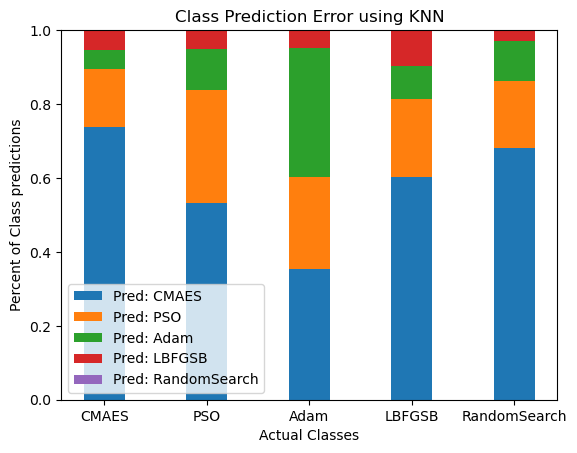

In [512]:
#class prediction error
#this is an extension of the confusion matrix and shows in detail which classes are being misclassified
plot_class_prediction_error(y_test_act_b, y_pred_list, opt_list, 'KNN')

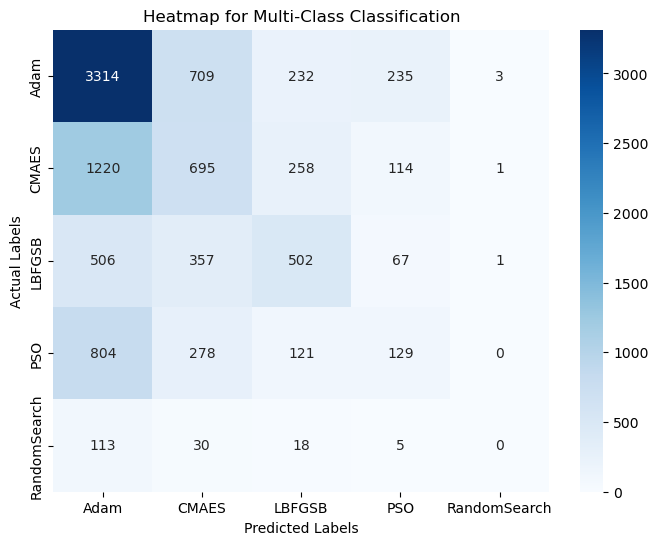

In [513]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Replace these with your actual data
# y_test_act_b = [...your actual labels...]
# y_pred_list = [...your predicted labels...]

# Generating the confusion matrix
cm = confusion_matrix(y_test_act_b, y_pred_list)

# Creating a heatmap from the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test_act_b),
            yticklabels=np.unique(y_test_act_b))
plt.title('Heatmap for Multi-Class Classification')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()


/Users/hjiang/miniforge3/envs/3dasm/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


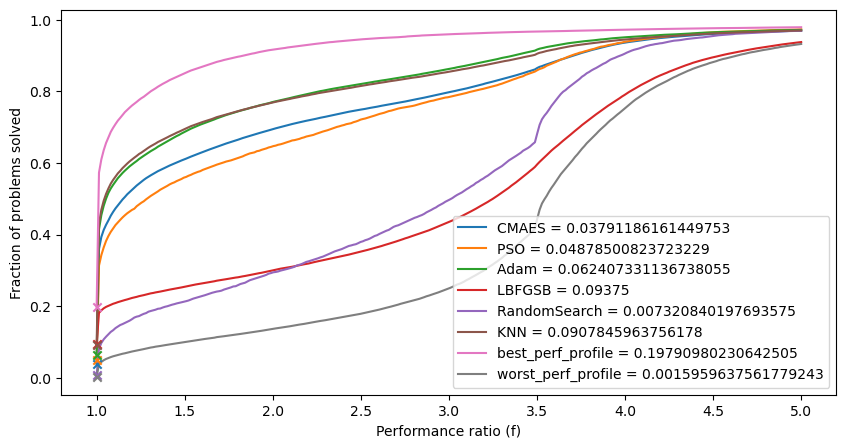

In [514]:

# Create the StrategyManager instance with the experiment data and your strategy
strategy_manager = StrategyManager(test_data_b, [knn_strategy])

# Compute the performance profiles
performance_profiles = strategy_manager.compute_performance_profiles()

# Plot the performance profiles
strategy_manager.plot()
plt.show()  # If not running in an interactive environment that automatically shows plots


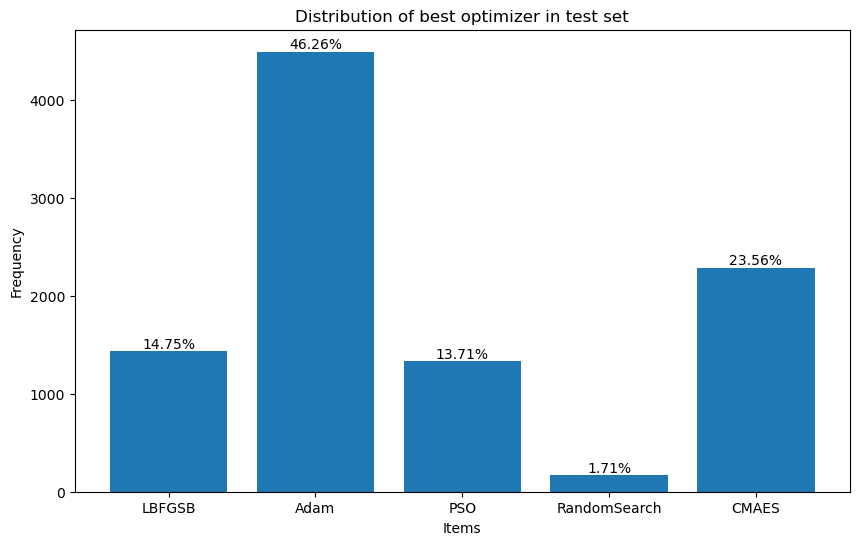

In [515]:
#code to show distribution of y_test_act_b visualization
import matplotlib.pyplot as plt
from collections import Counter

# Count the frequency of each item
frequency = Counter(y_test_act_b)

# Prepare data for plotting
labels = frequency.keys()
counts = frequency.values()

# Calculate total number of items
total_items = len(y_test_act_b)

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, counts)
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.title('Distribution of best optimizer in test set')

# Add percentage on top of each bar
for bar, count in zip(bars, counts):
    percentage = (count / total_items) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.2f}%', 
             ha='center', va='bottom')

plt.show()
# Populate the distribution dictionary with predefined keys
distribution_keys = ['CMAES', 'PSO', 'Adam', 'LBFGSB', 'RandomSearch']
distribution = {key: 0 for key in distribution_keys}  # Initialize with zeros

# Update the distribution dictionary with actual data
for key in distribution.keys():
    distribution[key] = frequency.get(key, 0) / total_items * 100


In [516]:
#get weights
distribution

{'CMAES': 23.55848434925865,
 'PSO': 13.714991762767708,
 'Adam': 46.26235584843493,
 'LBFGSB': 14.754942339373969,
 'RandomSearch': 1.7092257001647446}

In [517]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.base import ClassifierMixin
from collections import Counter
from joblib import dump

class CustomKNN(KNeighborsClassifier, ClassifierMixin):
    def __init__(self, n_neighbors=5, class_weights=None):
        super().__init__(n_neighbors=n_neighbors, weights='distance')
        self.class_weights = class_weights if class_weights else {}
        self.train_labels_ = None

    def fit(self, X, y):
        super().fit(X, y)
        self.train_labels_ = y  # Store training labels
        return self

    def predict(self, X):
        distances, indices = self.kneighbors(X)
        predictions = []

        for i in range(distances.shape[0]):
            class_weights = {}

            for j in range(distances.shape[1]):
                label = self.train_labels_[indices[i][j]]
                weight = 1 / distances[i][j] if distances[i][j] != 0 else 1.0

                # Apply specified class weights
                if label in self.class_weights:
                    weight *= self.class_weights[label]

                class_weights[label] = class_weights.get(label, 0) + weight

            # Find the class with the maximum weighted score
            predicted_class = max(class_weights, key=class_weights.get)
            predictions.append(predicted_class)

        return np.array(predictions)

class_weights = {
    'CMAES': .7,
    'PSO': .1,
    'Adam': 1.5,
    'LBFGSB': .1,
    'RandomSearch': .1}

# Initialize your custom kNN model with class weights
knn_custom = CustomKNN(n_neighbors=5, class_weights=class_weights)

# Fit the model with your training data
# Replace 'x_train_b_df' and 'train_best_optimizer_b' with your actual data
knn_custom.fit(x_train_b_df, train_best_optimizer_b)

# Save the model
dump(knn_custom, 'custom_knn_model.joblib')


/Users/hjiang/miniforge3/envs/3dasm/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/hjiang/miniforge3/envs/3dasm/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/hjiang/miniforge3/envs/3dasm/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


['custom_knn_model.joblib']

/Users/hjiang/miniforge3/envs/3dasm/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but CustomKNN was fitted with feature names
  warnings.warn(


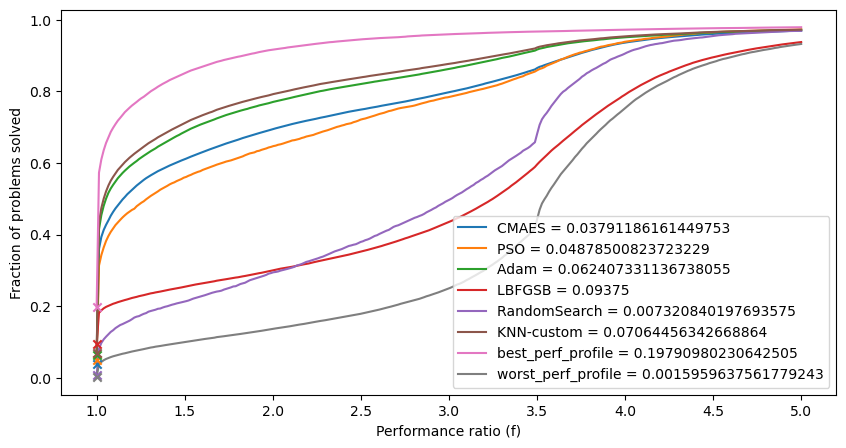

In [518]:

# Create an instance of your strategy with the pre-trained classifier
knn_custom_strategy = YourStrategy(knn_custom, name="KNN-custom")

# Create the StrategyManager instance with the experiment data and your strategy
strategy_manager = StrategyManager(test_data_b, [knn_custom_strategy])

# Compute the performance profiles
performance_profiles = strategy_manager.compute_performance_profiles()

# Plot the performance profiles
strategy_manager.plot()
plt.show()  # If not running in an interactive environment that automatically shows plots


/Users/hjiang/miniforge3/envs/3dasm/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but CustomKNN was fitted with feature names
  warnings.warn(


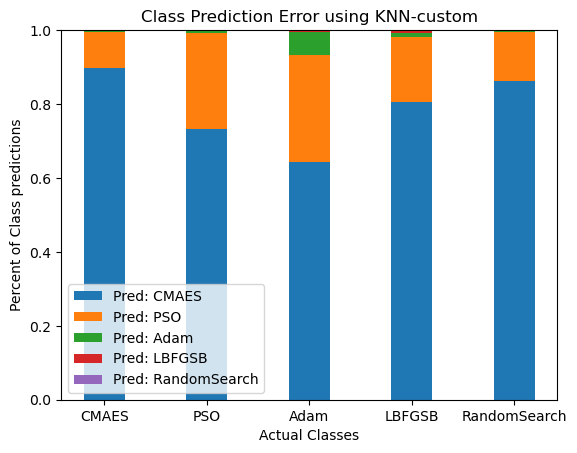

['LBFGSB', 'Adam', 'Adam', 'Adam', 'Adam', 'Adam', 'Adam', 'Adam', 'PSO', 'Adam', 'PSO', 'RandomSearch', 'Adam', 'Adam', 'Adam', 'PSO', 'Adam', 'Adam', 'Adam', 'CMAES', 'CMAES', 'PSO', 'CMAES', 'Adam', 'CMAES', 'PSO', 'Adam', 'Adam', 'Adam', 'Adam', 'Adam', 'CMAES', 'CMAES', 'Adam', 'Adam', 'Adam', 'CMAES', 'Adam', 'PSO', 'Adam', 'CMAES', 'Adam', 'CMAES', 'CMAES', 'Adam', 'CMAES', 'CMAES', 'PSO', 'Adam', 'LBFGSB', 'PSO', 'CMAES', 'Adam', 'Adam', 'PSO', 'LBFGSB', 'PSO', 'CMAES', 'Adam', 'LBFGSB', 'CMAES', 'LBFGSB', 'LBFGSB', 'PSO', 'CMAES', 'CMAES', 'CMAES', 'Adam', 'Adam', 'LBFGSB', 'Adam', 'LBFGSB', 'PSO', 'Adam', 'Adam', 'PSO', 'CMAES', 'Adam', 'LBFGSB', 'Adam', 'CMAES', 'CMAES', 'CMAES', 'CMAES', 'Adam', 'CMAES', 'Adam', 'PSO', 'Adam', 'LBFGSB', 'Adam', 'CMAES', 'Adam', 'Adam', 'LBFGSB', 'CMAES', 'PSO', 'LBFGSB', 'CMAES', 'CMAES', 'CMAES', 'CMAES', 'CMAES', 'LBFGSB', 'Adam', 'PSO', 'CMAES', 'Adam', 'CMAES', 'PSO', 'CMAES', 'CMAES', 'Adam', 'CMAES', 'CMAES', 'Adam', 'LBFGSB', 'CMAES'

In [519]:
y_pred_list=knn_custom_strategy.predict(x_test_b_df)
plot_class_prediction_error(y_test_act_b, y_pred_list, opt_list, 'KNN-custom')
print(y_test_act_b, y_pred_list)

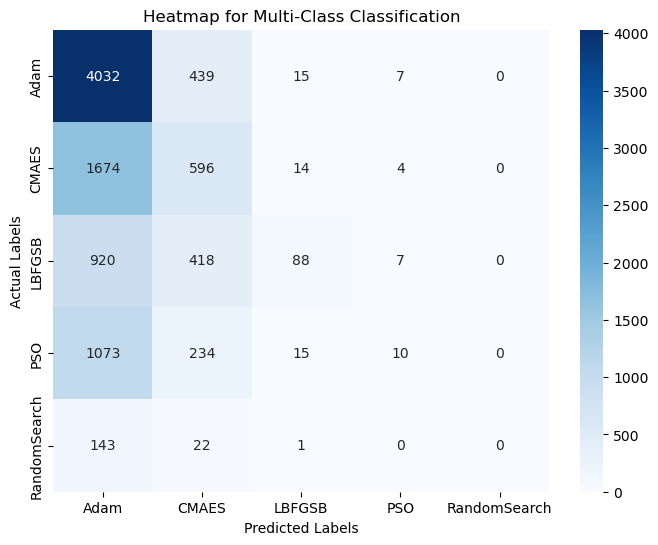

In [520]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Replace these with your actual data
# y_test_act_b = [...your actual labels...]
# y_pred_list = [...your predicted labels...]

# Generating the confusion matrix
cm = confusion_matrix(y_test_act_b, y_pred_list)

# Creating a heatmap from the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test_act_b),
            yticklabels=np.unique(y_test_act_b))
plt.title('Heatmap for Multi-Class Classification')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()


In [521]:
# import xgboost as xgb
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# import pickle  # Import pickle for model saving
# import optuna  # Import Optuna for hyperparameter optimization

# random_seed = 42

# # Assuming 'train_best_optimizer_b' is your y_train and 'x_train_b_df' is your training data
# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(train_best_optimizer_b)
# # Splitting data with a seed for consistency
# X_train_b, X_valid_b, y_train_b, y_valid_b = train_test_split(x_train_b_df, y_train_encoded, test_size=0.2, random_state=random_seed)

# def objective(trial):
#     # Define hyperparameters with a seed for consistency in XGBoost
#     param = {
#         'random_state': random_seed,
#         # Add other parameters here that you want to optimize
#         # Example: 'max_depth': trial.suggest_int('max_depth', 2, 32)
#     }

#     model = xgb.XGBClassifier(**param)
#     model.fit(X_train_b, y_train_b, eval_set=[(X_valid_b, y_valid_b)], verbose=False, early_stopping_rounds=10)
#     preds = model.predict(X_valid_b)
#     return accuracy_score(y_valid_b, preds)

# # Creating an Optuna study with a fixed seed for the sampler
# sampler = optuna.samplers.TPESampler(seed=random_seed)
# study = optuna.create_study(direction='maximize', sampler=sampler)
# study.optimize(objective, n_trials=50)

# # Best hyperparameters
# best_params = study.best_trial.params
# best_params['random_state'] = random_seed  # Ensure the model uses the same seed
# print('Best parameters:', best_params)

# # Train the final model with the best parameters
# best_xgb_model = xgb.XGBClassifier(**best_params)
# best_xgb_model.fit(x_train_b_df, y_train_encoded)

# # Save the model
# with open('best_xgb_b_model.pkl', 'wb') as file:
#     pickle.dump(best_xgb_model, file)

# Load saved model
with open('best_xgb_b_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
best_xgb_model_b = loaded_model


In [522]:
# check if output
xgb_strategy_b = YourStrategy(best_xgb_model_b, name="XGBoost-b")
print(xgb_strategy_b.predict(x_test))

['LBFGSB', 'Adam', 'CMAES', 'CMAES', 'LBFGSB', 'PSO', 'CMAES', 'CMAES', 'Adam', 'CMAES', 'CMAES', 'CMAES', 'Adam', 'CMAES', 'CMAES', 'CMAES', 'PSO', 'PSO', 'CMAES', 'CMAES', 'PSO', 'CMAES', 'PSO', 'Adam', 'PSO', 'CMAES', 'CMAES', 'CMAES', 'CMAES', 'PSO', 'CMAES', 'CMAES', 'CMAES', 'CMAES', 'PSO', 'Adam', 'CMAES', 'Adam', 'CMAES', 'PSO', 'LBFGSB', 'CMAES', 'CMAES', 'CMAES', 'CMAES', 'Adam', 'PSO', 'CMAES', 'PSO', 'CMAES', 'Adam', 'CMAES', 'PSO', 'Adam', 'Adam', 'CMAES', 'Adam', 'CMAES', 'Adam', 'CMAES', 'CMAES', 'PSO', 'Adam', 'Adam', 'PSO', 'PSO', 'CMAES', 'CMAES', 'CMAES', 'PSO', 'LBFGSB', 'CMAES', 'Adam', 'CMAES', 'CMAES', 'PSO', 'Adam', 'CMAES', 'Adam', 'CMAES', 'PSO', 'CMAES', 'Adam', 'CMAES', 'CMAES', 'PSO', 'LBFGSB', 'CMAES', 'CMAES', 'CMAES', 'CMAES', 'CMAES', 'CMAES', 'Adam', 'LBFGSB', 'PSO', 'CMAES', 'PSO', 'CMAES', 'PSO', 'PSO', 'CMAES', 'LBFGSB', 'CMAES', 'Adam', 'CMAES', 'Adam', 'Adam', 'CMAES', 'PSO', 'Adam', 'PSO', 'CMAES', 'CMAES', 'CMAES', 'PSO', 'Adam', 'Adam', 'PSO', 

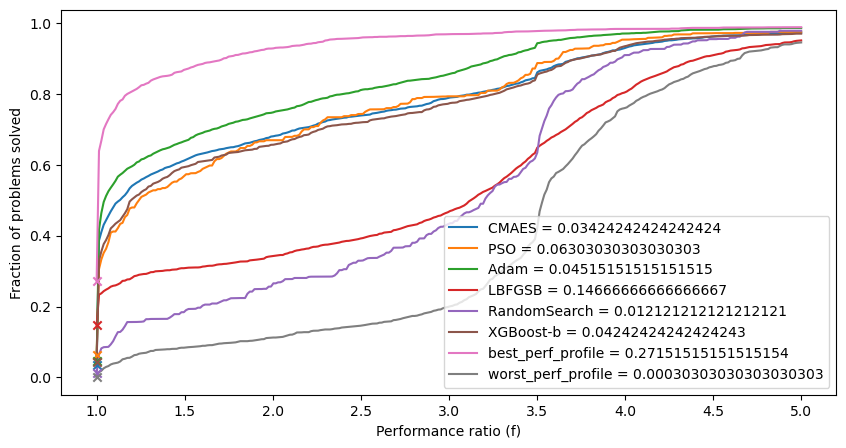

In [523]:


# Create the StrategyManager instance with the experiment data and your strategy
strategy_manager = StrategyManager(test_data, [xgb_strategy_b])

# Compute the performance profiles
performance_profiles = strategy_manager.compute_performance_profiles()

# Plot the performance profiles
strategy_manager.plot()
plt.show()  # If not running in an interactive environment that automatically shows plots
